In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
# from keras.optimizers import Adam, SGD
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt

In [2]:

train_path = r'D:\Desktop\ML\sign_language\gesture\contours\train'
test_path = r'D:\Desktop\ML\sign_language\gesture\contours\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), classes =['1','2','3','4','5','6','7','8','9','10'],  class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), classes = ['1','2','3','4','5','6','7','8','9','10'], class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)


Found 3010 images belonging to 10 classes.
Found 410 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

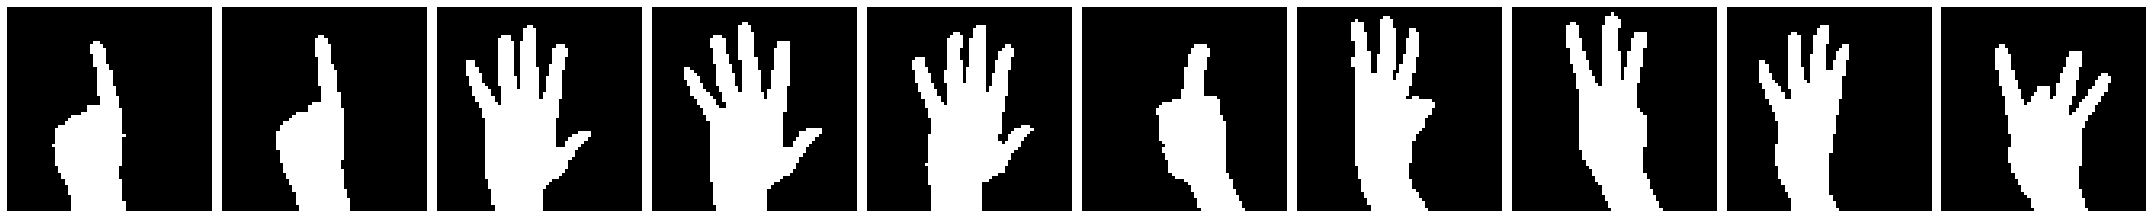

(10, 64, 64, 3)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [3]:

#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)



In [4]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(64,activation ="relu"),
    Dense(128,activation ="relu"),
    Dense(128,activation ="relu"),
    Dense(10,activation ="softmax")
])

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# model.compile(optimizer=gradient_descent_v2.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


Epoch 1/10
301/301 [==============================] - 30s 98ms/step - loss: 0.7331 - accuracy: 0.8934 - val_loss: 1.0288 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 2/10
301/301 [==============================] - 18s 58ms/step - loss: 0.0670 - accuracy: 0.9817 - val_loss: 2.4595 - val_accuracy: 0.7756 - lr: 0.0010
Epoch 3/10
301/301 [==============================] - 19s 63ms/step - loss: 0.0190 - accuracy: 0.9960 - val_loss: 1.3214 - val_accuracy: 0.8098 - lr: 2.0000e-04
loss of 1.1002273559570312; accuracy of 60.00000238418579%


In [6]:

model.save('best_model_dataflair.h5')
# model.save('best_model_dataflair_grayedges.h5')

print(history2.history)

imgs, labels = next(test_batches)



{'loss': [0.7330610156059265, 0.06701863557100296, 0.019035520032048225], 'accuracy': [0.8933554887771606, 0.9817276000976562, 0.9960132837295532], 'val_loss': [1.0288382768630981, 2.4595224857330322, 1.3214125633239746], 'val_accuracy': [0.8609756231307983, 0.7756097316741943, 0.8097561001777649], 'lr': [0.001, 0.001, 0.00020000001]}


In [7]:
model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

# model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names

loss of 13.355707168579102; accuracy of 10.000000149011612%


['loss', 'accuracy']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data--

8            6            6            1            4            9            3            10            4            6            

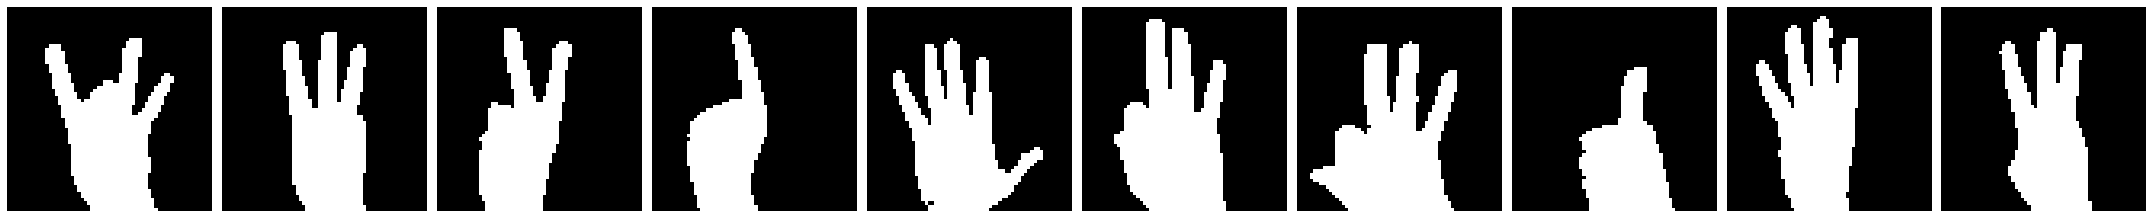

Actual labels
9
7
3
1
6
10
10
2
5
7
(10, 64, 64, 3)


{'loss': [0.7330610156059265, 0.06701863557100296, 0.019035520032048225],
 'accuracy': [0.8933554887771606, 0.9817276000976562, 0.9960132837295532],
 'val_loss': [1.0288382768630981, 2.4595224857330322, 1.3214125633239746],
 'val_accuracy': [0.8609756231307983, 0.7756097316741943, 0.8097561001777649],
 'lr': [0.001, 0.001, 0.00020000001]}

In [22]:
word_dict = {'1':'One','2':'Two','3':'Three','4':'Four','5':'Five','6':'Six','7':'Seven','8':'Eight','9':'Nine', '10':'Ten'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")

print("")
for ind, i in enumerate(predictions):
    print(np.argmax(i)+1, end="            ")
#     print(word_dict[str(np.argmax(i))], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
#     print(word_dict[np.argmax(i)], end='   ')
    print(np.argmax(i)+1)

print(imgs.shape)

history2.history